In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
rawdata = pd.read_csv("data.csv")

In [4]:
rawdata.head()

,Household_ID,City,Latitude,House_Type,Roof_Type,Roof_Pitch,Roof_Azimuth,Floors,Financed,Year,Panel_Capacity,Shading,Generation
0,A553C5784D,Brisbane,NaN,NaN,Steel,10.0,21.0,Double,No,2019,5040,None,10163.796
1,1A12B988A0,Brisbane,-27.217398,Timber Frame,Tile,35.0,50.0,Single,Yes,2011,5880,NaN,10876.910
2,D23C0BBB05,Brisbane,-27.252449,Double Brick,NaN,20.0,272.0,Single,Yes,2018,5040,NaN,9400.415
3,E67A638AD3,Brisbane,-27.042364,Timber Frame,Steel,35.0,247.0,NaN,Yes,2012,5040,None,7747.349
4,7F266FCAD1,Brisbane,-27.432734,Other,Steel,10.0,39.0,Double,Yes,2012,5880,None,10987.674


In [5]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Household_ID    3000 non-null   object 
 1   City            3000 non-null   object 
 2   Latitude        2930 non-null   float64
 3   House_Type      2818 non-null   object 
 4   Roof_Type       2661 non-null   object 
 5   Roof_Pitch      2972 non-null   float64
 6   Roof_Azimuth    2916 non-null   float64
 7   Floors          2731 non-null   object 
 8   Financed        3000 non-null   object 
 9   Year            3000 non-null   int64  
 10  Panel_Capacity  3000 non-null   int64  
 11  Shading         2904 non-null   object 
 12  Generation      3000 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 304.8+ KB


In [6]:
rawdata.isnull().sum().sort_values(ascending = False)

Roof_Type         339
Floors            269
House_Type        182
Shading            96
Roof_Azimuth       84
Latitude           70
Roof_Pitch         28
Household_ID        0
City                0
Financed            0
Year                0
Panel_Capacity      0
Generation          0
dtype: int64

In [7]:
cleandata = rawdata.copy()

In [8]:
cleandata = cleandata.dropna()

# cleandata['Latitude'] = cleandata['Latitude'].fillna(0)
# cleandata['Roof_Pitch'] = cleandata['Roof_Pitch'].fillna(0)
# cleandata['Roof_Azimuth'] = cleandata['Roof_Azimuth'].fillna(0)
# cleandata['House_Type'] = cleandata['House_Type'].fillna('Unknown')
# cleandata['Roof_Type'] = cleandata['Roof_Type'].fillna('Unknown')
# cleandata['Floors'] = cleandata['Floors'].fillna('Unknown')
# cleandata['Shading'] = cleandata['Shading'].fillna('Unknown')

In [9]:
cleandata.isnull().sum().sort_values(ascending = False)

Household_ID      0
City              0
Latitude          0
House_Type        0
Roof_Type         0
Roof_Pitch        0
Roof_Azimuth      0
Floors            0
Financed          0
Year              0
Panel_Capacity    0
Shading           0
Generation        0
dtype: int64

In [10]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 4 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Household_ID    2065 non-null   object 
 1   City            2065 non-null   object 
 2   Latitude        2065 non-null   float64
 3   House_Type      2065 non-null   object 
 4   Roof_Type       2065 non-null   object 
 5   Roof_Pitch      2065 non-null   float64
 6   Roof_Azimuth    2065 non-null   float64
 7   Floors          2065 non-null   object 
 8   Financed        2065 non-null   object 
 9   Year            2065 non-null   int64  
 10  Panel_Capacity  2065 non-null   int64  
 11  Shading         2065 non-null   object 
 12  Generation      2065 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 225.9+ KB


In [11]:
cleandata['House_Type'].value_counts()

Timber Frame    1447
Double Brick     422
Other            189
Weatherboard       7
Name: House_Type, dtype: int64

In [12]:
cleandata['Roof_Type'].value_counts()

Tile         1055
Steel         783
Other         200
Colorbond      27
Name: Roof_Type, dtype: int64

In [13]:
cleandata['Floors'].value_counts()

Single    891
Double    849
Other     325
Name: Floors, dtype: int64

In [14]:
cleandata['Financed'].value_counts()

Yes    1410
No      655
Name: Financed, dtype: int64

In [15]:
cleandata['Shading'].value_counts()

None           1577
Partial         401
Significant      87
Name: Shading, dtype: int64

In [16]:
cleandata['City'].value_counts()

Sydney       691
Melbourne    688
Brisbane     686
Name: City, dtype: int64

In [17]:
cleandata.columns

Index(['Household_ID', 'City', 'Latitude', 'House_Type', 'Roof_Type',
       'Roof_Pitch', 'Roof_Azimuth', 'Floors', 'Financed', 'Year',
       'Panel_Capacity', 'Shading', 'Generation'],
      dtype='object')

In [18]:
cleandata.describe()

,Latitude,Roof_Pitch,Roof_Azimuth,Year,Panel_Capacity,Generation
count,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000
mean,-33.068183,23.674334,181.344310,2015.630508,6428.745763,9153.458138
std,4.365406,7.514996,122.504481,3.903206,983.552938,12763.254754
min,-38.728617,5.000000,0.000000,2003.000000,2940.000000,-243623.120000
25%,-37.826836,20.000000,66.000000,2012.000000,5880.000000,8197.087000
50%,-33.814686,25.000000,178.000000,2016.000000,6300.000000,9978.445000
75%,-27.546973,30.000000,302.000000,2019.000000,7140.000000,11635.603000
max,-26.509521,35.000000,360.000000,2022.000000,9660.000000,18868.140000


In [19]:
%%time

city_dummies = pd.get_dummies(cleandata['City'], prefix = 'City')
house_dummies = pd.get_dummies(cleandata['House_Type'], prefix = 'House_Type')
roof_dummies = pd.get_dummies(cleandata['Roof_Type'], prefix = 'Roof_Type')
floors_dummies = pd.get_dummies(cleandata['Floors'], prefix = 'Floors')
# financed_dummies = pd.get_dummies(cleandata['Financed'], prefix = 'Financed')
shading_dummies = pd.get_dummies(cleandata['Shading'], prefix = 'Shading')

cleandata_processed = pd.concat([cleandata, city_dummies, house_dummies, roof_dummies, floors_dummies, 
                       shading_dummies], axis=1)

cleandata_processed['Financed'].replace({'Yes': 1, 'No': 0}, inplace = True)

CPU times: user 6.86 ms, sys: 1.52 ms, total: 8.38 ms
Wall time: 7.49 ms


In [20]:
cleandata_processed.head()

,Household_ID,City,Latitude,House_Type,Roof_Type,Roof_Pitch,Roof_Azimuth,Floors,Financed,Year,Panel_Capacity,Shading,Generation,City_Brisbane,City_Melbourne,City_Sydney,House_Type_Double Brick,House_Type_Other,House_Type_Timber Frame,House_Type_Weatherboard,Roof_Type_Colorbond,Roof_Type_Other,Roof_Type_Steel,Roof_Type_Tile,Floors_Double,Floors_Other,Floors_Single,Shading_None,Shading_Partial,Shading_Significant
4,7F266FCAD1,Brisbane,-27.432734,Other,Steel,10.0,39.0,Double,1,2012,5880,None,10987.674,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
5,F9E101CA63,Brisbane,-27.677593,Timber Frame,Tile,12.5,158.0,Single,1,2020,7980,None,14452.109,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
6,DAF9491C79,Brisbane,-27.236922,Timber Frame,Tile,30.0,183.0,Other,0,2013,6300,Partial,6999.213,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
8,1859089367,Brisbane,-27.637416,Timber Frame,Steel,10.0,359.0,Other,1,2021,6300,None,12963.873,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
10,6341B22A88,Brisbane,-27.765785,Timber Frame,Tile,20.0,290.0,Single,1,2016,6720,None,12568.536,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0


In [21]:
cleandata_processed.columns

Index(['Household_ID', 'City', 'Latitude', 'House_Type', 'Roof_Type',
       'Roof_Pitch', 'Roof_Azimuth', 'Floors', 'Financed', 'Year',
       'Panel_Capacity', 'Shading', 'Generation', 'City_Brisbane',
       'City_Melbourne', 'City_Sydney', 'House_Type_Double Brick',
       'House_Type_Other', 'House_Type_Timber Frame',
       'House_Type_Weatherboard', 'Roof_Type_Colorbond', 'Roof_Type_Other',
       'Roof_Type_Steel', 'Roof_Type_Tile', 'Floors_Double', 'Floors_Other',
       'Floors_Single', 'Shading_None', 'Shading_Partial',
       'Shading_Significant'],
      dtype='object')

In [22]:
response_y = 'Generation'

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# in_sample, out_of_sample = train_test_split(np.array(cleandata_processed.index), test_size = 0.8,
#                                        random_state = 0, stratify = cleandata_processed[response_y])

# train_indices, test_indices = train_test_split(cleandata_processed.index, test_size = 0.2, 
#                                                random_state = 42)
# train = cleandata_processed.loc[train_indices].copy()
# test = cleandata_processed.loc[test_indices].copy()

In [25]:
train = cleandata_processed.loc[cleandata_processed['Year']<2021]
test = cleandata_processed.loc[cleandata_processed['Year']>=2021]

In [26]:
len(train)

1821

In [27]:
len(test)

244

In [28]:
# predictors = ['Latitude', 'Roof_Pitch', 'Roof_Azimuth', 'Financed', 'Panel_Capacity', 'Year',
#               'House_Type_Double Brick', 'House_Type_Other', 'House_Type_Timber Frame', 
#               'House_Type_Unknown', 'House_Type_Weatherboard', 
#               'Roof_Type_Colorbond', 'Roof_Type_Other', 'Roof_Type_Steel', 'Roof_Type_Tile', 
#               'Roof_Type_Unknown', 
#               'Floors_Double', 'Floors_Other', 'Floors_Single', 'Floors_Unknown', 
#               'Shading_None', 'Shading_Partial', 'Shading_Significant', 'Shading_Unknown', 
#               'City_Brisbane', 'City_Melbourne', 'City_Sydney']

In [29]:
predictors = ['Latitude', 'Roof_Pitch', 'Roof_Azimuth', 'Financed', 'Panel_Capacity', 'Year', 
              'House_Type_Double Brick', 'House_Type_Other', 'House_Type_Timber Frame', 
              'House_Type_Weatherboard', 
              'Roof_Type_Colorbond', 'Roof_Type_Other', 'Roof_Type_Steel', 'Roof_Type_Tile', 
              'Floors_Double', 'Floors_Other', 'Floors_Single', 
              'Shading_None', 'Shading_Partial', 'Shading_Significant', 
              'City_Brisbane', 'City_Melbourne', 'City_Sydney']

In [30]:
len(predictors)

23

In [31]:
X_train = train[predictors].to_numpy()
X_test = test[predictors].to_numpy()

y_train = train[response_y].to_numpy()
y_test = test[response_y].to_numpy()

In [32]:
X = cleandata_processed[predictors].to_numpy()
y = cleandata_processed[response_y].to_numpy()

### Model

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### DecisionTree

In [34]:
%%time

from sklearn.tree import DecisionTreeRegressor

DecisionTree = DecisionTreeRegressor()

DecisionTree.fit(X_train, y_train)

train_predictions = DecisionTree.predict(X_train)
test_predictions = DecisionTree.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
DecisionTree_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", DecisionTree_r2)

The mean square error of the training set (MSE): 0.0
The mean square error of the test set (MSE): 1318086044.871712
The root mean square error of the training set (RMSE): 0.0
The root mean square error of the test set (RMSE): 36305.45475368284
The mean absolute error of the training set (MAE): 0.0
The mean absolute error of the test set (MAE): 7385.537254098362
r2_score: -0.0164690561948988
CPU times: user 40.4 ms, sys: 10.1 ms, total: 50.5 ms
Wall time: 68.2 ms


##### Fine Tuning

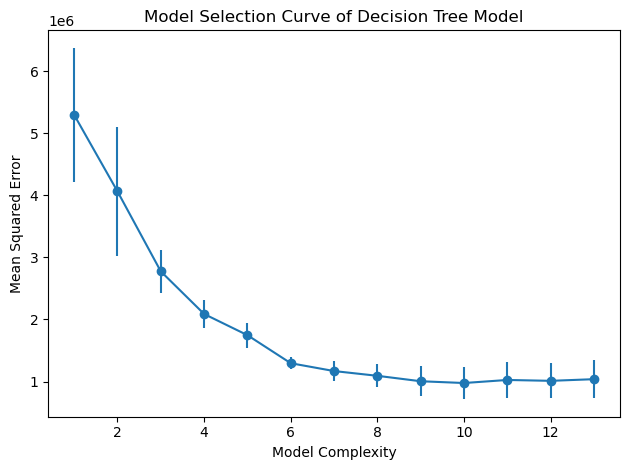

In [35]:
from sklearn.model_selection import cross_val_score

complexities = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# complexities = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
models = [DecisionTreeRegressor(max_depth=complexity) for complexity in complexities]

mean_scores = []
std_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(-np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(complexities, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('Model Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Model Selection Curve of Decision Tree Model')
plt.tight_layout()
plt.savefig("Model Selection Curve of Decision Tree Model")
plt.show()

In [36]:
%%time

from sklearn.tree import DecisionTreeRegressor

DecisionTree = DecisionTreeRegressor(max_depth=6)

DecisionTree.fit(X_train, y_train)

train_predictions = DecisionTree.predict(X_train)
test_predictions = DecisionTree.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
DecisionTree_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", DecisionTree_r2)

The mean square error of the training set (MSE): 834804.2246687675
The mean square error of the test set (MSE): 1316586650.862702
The root mean square error of the training set (RMSE): 913.6762143499017
The root mean square error of the test set (RMSE): 36284.79917076436
The mean absolute error of the training set (MAE): 717.5668984469639
The mean absolute error of the test set (MAE): 7804.655833429056
r2_score: -0.015312767787831305
CPU times: user 5.98 ms, sys: 848 µs, total: 6.83 ms
Wall time: 5.76 ms


In [37]:
feature_importance = pd.Series(DecisionTree.feature_importances_, index = predictors).sort_values()

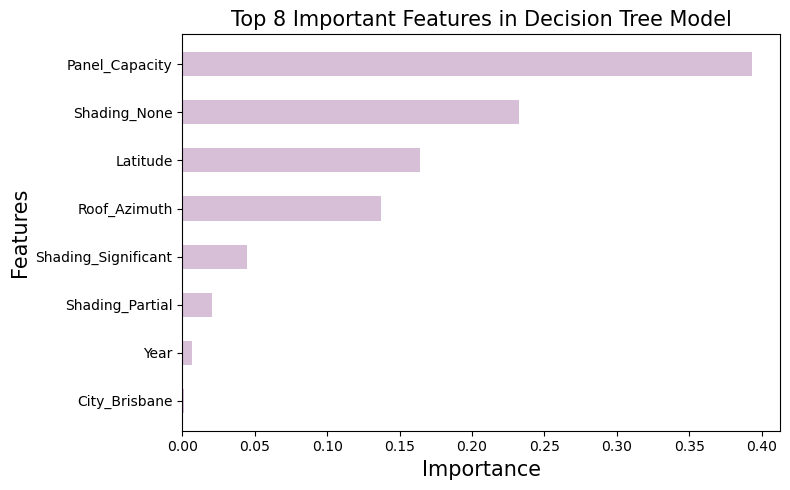

In [38]:
plt.figure(figsize = (8,5))
plt.barh(range(8),feature_importance[-8:], tick_label = feature_importance.index[-8:], color = 'thistle', height = 0.5)
plt.title("Top 8 Important Features in Decision Tree Model",fontsize = 15)
plt.xlabel("Importance",fontsize = 15)
plt.ylabel("Features", fontsize = 15)
plt.tight_layout()
plt.savefig("Top 8 Important Features in Decision Tree Model")

#### SVR

In [39]:
%%time

from sklearn.svm import SVR

SVR = SVR()

SVR.fit(X_train, y_train)

train_predictions = SVR.predict(X_train)
test_predictions = SVR.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
SVR_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", SVR_r2)

The mean square error of the training set (MSE): 6192604.086875627
The mean square error of the test set (MSE): 1335575303.6046872
The root mean square error of the training set (RMSE): 2488.49434133888
The root mean square error of the test set (RMSE): 36545.5237150145
The mean absolute error of the training set (MAE): 1995.9659936905111
The mean absolute error of the test set (MAE): 8970.509786155353
r2_score: -0.0299562563568474
CPU times: user 294 ms, sys: 18.7 ms, total: 313 ms
Wall time: 312 ms


#### RandomForest

In [40]:
%%time

from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor(random_state = 123)

RandomForest.fit(X_train, y_train)

train_predictions = RandomForest.predict(X_train)
test_predictions = RandomForest.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
RandomForest_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", RandomForest_r2)

The mean square error of the training set (MSE): 35650.4161646671
The mean square error of the test set (MSE): 1316274017.285808
The root mean square error of the training set (RMSE): 188.81317794229062
The root mean square error of the test set (RMSE): 36280.490863352556
The mean absolute error of the training set (MAE): 136.60310998352568
The mean absolute error of the test set (MAE): 7270.147425614756
r2_score: -0.015071674000307844
CPU times: user 481 ms, sys: 10.4 ms, total: 491 ms
Wall time: 504 ms


##### Fine Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
%%time
param_test1 = {'n_estimators':range(1, 100, 10)}

gsearch1 = GridSearchCV(estimator = RandomForestRegressor(min_samples_split = 100,
                                                          min_samples_leaf = 20,
                                                          max_depth = 8,
                                                          max_features = 'sqrt',
                                                          random_state = 123),
                        param_grid = param_test1, scoring = 'neg_mean_squared_error', cv = 5)

gsearch1.fit(X_train, y_train)

gsearch1.best_params_, gsearch1.best_score_ 

CPU times: user 2.29 s, sys: 0 ns, total: 2.29 s
Wall time: 2.29 s


({'n_estimators': 31}, -2516977.541060365)

In [43]:
%%time
param_test2 = {'max_depth':range(3, 15, 2), 'min_samples_split':range(10,101,20)}

gsearch2 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 31,
                                                          min_samples_leaf = 10,
                                                          max_features = 'sqrt',
                                                          oob_score = True,
                                                          random_state = 123),
                        param_grid = param_test2, scoring = 'neg_mean_squared_error', cv = 5)

gsearch2.fit(X_train, y_train)

gsearch2.best_params_, gsearch2.best_score_ 

CPU times: user 5.35 s, sys: 5.65 ms, total: 5.36 s
Wall time: 5.36 s


({'max_depth': 9, 'min_samples_split': 10}, -1689363.7548252612)

In [44]:
%%time
param_test3 = {'min_samples_split':range(10,51,10), 'min_samples_leaf':range(1,10,2)}

gsearch3 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 31,
                                                          max_depth = 9,
                                                          max_features = 'sqrt',
                                                          oob_score = True,
                                                          random_state = 123),
                        param_grid = param_test3, scoring = 'neg_mean_squared_error', cv = 5)

gsearch3.fit(X_train, y_train)

gsearch3.best_params_, gsearch3.best_score_ 

CPU times: user 4.97 s, sys: 29.3 ms, total: 5 s
Wall time: 5 s


({'min_samples_leaf': 1, 'min_samples_split': 10}, -1358930.443235296)

In [45]:
%%time
param_test4 = {'max_features':range(2,50,2)}

gsearch4 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 31,
                                                          min_samples_leaf = 1,
                                                          min_samples_split = 10,
                                                          max_depth = 9,
                                                          oob_score = True,
                                                          random_state = 123),
                        param_grid = param_test4, scoring = 'neg_mean_squared_error', cv = 5)

gsearch4.fit(X_train, y_train)

gsearch4.best_params_, gsearch4.best_score_ 

CPU times: user 9.06 s, sys: 0 ns, total: 9.06 s
Wall time: 9.06 s


({'max_features': 22}, -464703.85199927987)

In [46]:
%%time

from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor(n_estimators = 31, 
                                     min_samples_leaf = 1, 
                                     min_samples_split = 10,
                                     max_depth = 11,
                                     max_features = 22,
                                     oob_score = True,
                                     random_state = 123)

RandomForest.fit(X_train, y_train)

train_predictions = RandomForest.predict(X_train)
test_predictions = RandomForest.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
RandomForest_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", RandomForest_r2)

The mean square error of the training set (MSE): 123119.04203655584
The mean square error of the test set (MSE): 1316158696.2604744
The root mean square error of the training set (RMSE): 350.8832313413621
The root mean square error of the test set (RMSE): 36278.90153051046
The mean absolute error of the training set (MAE): 261.32479280091286
The mean absolute error of the test set (MAE): 7332.651669092992
r2_score: -0.01498274182912196
CPU times: user 112 ms, sys: 2.21 ms, total: 115 ms
Wall time: 114 ms


In [47]:
feature_importance = pd.Series(RandomForest.feature_importances_, index = predictors).sort_values()

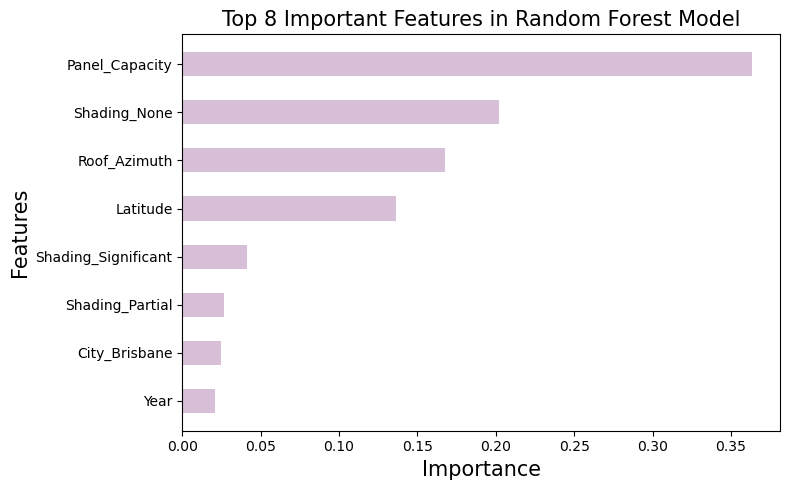

In [48]:
plt.figure(figsize = (8,5))
plt.barh(range(8),feature_importance[-8:], tick_label = feature_importance.index[-8:], color = 'thistle', height = 0.5)
plt.title("Top 8 Important Features in Random Forest Model",fontsize = 15)
plt.xlabel("Importance",fontsize = 15)
plt.ylabel("Features", fontsize = 15)
plt.tight_layout()
plt.savefig("Top 8 Important Features in Random Forest Model")

#### MLP

In [49]:
%%time

import torch
import torch.nn as nn
import torch.optim as optim

X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(len(predictors), 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

MLP = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(MLP.parameters(), lr=0.001)

num_epochs = 10
batch_size = 32
for epoch in range(num_epochs):
    MLP.train()
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = MLP(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()

MLP.eval()
train_predictions = MLP(X_train_tensor).detach().numpy()
test_predictions = MLP(X_test_tensor).detach().numpy()

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
MLP_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", MLP_r2)

The mean square error of the training set (MSE): 5941750.552881507
The mean square error of the test set (MSE): 1314297054.8002558
The root mean square error of the training set (RMSE): 2437.570625208941
The root mean square error of the test set (RMSE): 36253.235094267875
The mean absolute error of the training set (MAE): 2006.6111762681905
The mean absolute error of the test set (MAE): 9138.995214059296
r2_score: -0.01354709887894856
CPU times: user 6.29 s, sys: 211 ms, total: 6.5 s
Wall time: 2.64 s


### Benchmark Model 1

In [50]:
cleandata_processed['City'].value_counts()

Sydney       691
Melbourne    688
Brisbane     686
Name: City, dtype: int64

In [51]:
benchmark_1 = cleandata_processed.loc[cleandata_processed['Year'].isin([2019, 2020, 2021])]

In [52]:
b1 = benchmark_1.groupby("City")["Generation"].mean()

In [53]:
City = ['Brisbane','Melbourne','Sydney']

In [54]:
train_b1 = train.copy()
test_b1 = test.copy()
all_b1 = cleandata_processed.copy()
train_b1["Generation_predictions"] = None
test_b1["Generation_predictions"] = None
all_b1["Generation_predictions"] = None
for i in City:
    train_b1.loc[train_b1['City']==i,"Generation_predictions"] = b1[i]
    test_b1.loc[test_b1['City']==i,"Generation_predictions"] = b1[i]
    all_b1.loc[all_b1['City']==i,"Generation_predictions"] = b1[i]

In [55]:
train_predictions = train_b1["Generation_predictions"]
train_predictions = np.array(train_predictions)
test_predictions = test_b1["Generation_predictions"]
test_predictions = np.array(test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
benchmark1_r2 = r2_score(y_test,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", benchmark1_r2)

The mean square error of the training set (MSE): 5686774.494760039
The mean square error of the test set (MSE): 1341067974.7770827
The root mean square error of the training set (RMSE): 2384.695891462901
The root mean square error of the test set (RMSE): 36620.594953892854
The mean absolute error of the training set (MAE): 1902.993335271102
The mean absolute error of the test set (MAE): 8883.119140822397
r2_score: -0.03419204225589101


### Benchmark Model 2

In [56]:
cleandata_processed['Panel_Capacity'].value_counts()

6300    354
6720    341
5880    301
7140    278
5460    204
7560    179
5040    122
7980    107
4620     66
8400     40
4200     33
8820     18
3780     10
9240      7
3360      2
2940      2
9660      1
Name: Panel_Capacity, dtype: int64

In [57]:
benchmark_2 = cleandata_processed.loc[cleandata_processed['Year'].isin([2019, 2020, 2021])]

In [58]:
# benchmark_2["Generation_predictions"] = benchmark_2.groupby(["City", "Panel_Capacity"])["Generation"].transform('mean')

In [59]:
b2 = benchmark_2.groupby(["City", "Panel_Capacity"])["Generation"].mean()

In [60]:
train_predictions = benchmark_2.groupby(["City", "Panel_Capacity"])["Generation"].transform('mean')
train_predictions = np.array(train_predictions)

In [61]:
# Panel_Capacity = [6300,6720,5880,7140,5460,7560,5040,7980,4620,8400,4200,8820,3780,9240,3360,9660,2940]

In [62]:
train_b2 = train.copy()
test_b2 = test.copy()
all_b2 =cleandata_processed.copy()
train_b2["Generation_predictions"] = None
test_b2["Generation_predictions"] = None
all_b2["Generation_predictions"] = None

for i in b2.loc[("Sydney", )].index.get_level_values("Panel_Capacity"):
    train_b2.loc[(train_b2['City']=="Sydney") & (train_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Sydney"][i]
    test_b2.loc[(test_b2['City']=="Sydney") & (test_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Sydney"][i]
    all_b2.loc[(all_b2['City']=="Sydney") & (all_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Sydney"][i]
    
for i in b2.loc[("Brisbane", )].index.get_level_values("Panel_Capacity"):
    train_b2.loc[(train_b2['City']=="Brisbane") & (train_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Brisbane"][i]
    test_b2.loc[(test_b2['City']=="Brisbane") & (test_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Brisbane"][i]
    all_b2.loc[(all_b2['City']=="Brisbane") & (all_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Brisbane"][i]
    
for i in b2.loc[("Melbourne", )].index.get_level_values("Panel_Capacity"):
    train_b2.loc[(train_b2['City']=="Melbourne") & (train_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Melbourne"][i]
    test_b2.loc[(test_b2['City']=="Melbourne") & (test_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Melbourne"][i]
    all_b2.loc[(all_b2['City']=="Melbourne") & (all_b2['Panel_Capacity']==i),"Generation_predictions"] = b2["Melbourne"][i]
    
    

In [63]:
train_b2 = train_b2.dropna()
test_b2 = test_b2.dropna()
all_b2 = all_b2.dropna()

In [64]:
train_predictions = train_b2["Generation_predictions"]
train_predictions = np.array(train_predictions)
test_predictions = test_b2["Generation_predictions"]
test_predictions = np.array(test_predictions)
y_train_b2 = train_b2["Generation"]
y_train_b2 = np.array(y_train_b2)
y_test_b2 = test_b2["Generation"]
y_test_b2 = np.array(y_test_b2)
y_all_b2 = all_b2["Generation"]
y_all_b2 = np.array(y_all_b2)

train_mse = mean_squared_error(y_train_b2, train_predictions)
test_mse = mean_squared_error(y_test_b2, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train_b2, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_b2, test_predictions))
train_mae = mean_absolute_error(y_train_b2, train_predictions)
test_mae = mean_absolute_error(y_test_b2, test_predictions)
benchmark2_r2 = r2_score(y_test_b2,test_predictions)

print("The mean square error of the training set (MSE):", train_mse)
print("The mean square error of the test set (MSE):", test_mse)
print("The root mean square error of the training set (RMSE):", train_rmse)
print("The root mean square error of the test set (RMSE):", test_rmse)
print("The mean absolute error of the training set (MAE):", train_mae)
print("The mean absolute error of the test set (MAE):", test_mae)
print("r2_score:", benchmark2_r2)

The mean square error of the training set (MSE): 3683430.419783834
The mean square error of the test set (MSE): 1331065901.1497436
The root mean square error of the training set (RMSE): 1919.226516017282
The root mean square error of the test set (RMSE): 36483.77586201493
The mean absolute error of the training set (MAE): 1446.8060109351018
The mean absolute error of the test set (MAE): 8273.159737795637
r2_score: -0.026478738272794233


### Comparison

In [65]:
%%time

scores = ['train_MSE','test_MSE','train_RMSE','test_RMSE','train_MAE','test_MAE']

models = ['DecisionTree','SVR','RandomForest','MLP','BenchmarkModel1','BenchmarkModel2']

results = pd.DataFrame(0.0, columns = scores, index = models)

models_names = [DecisionTree, SVR, RandomForest,MLP,'BenchmarkModel1','BenchmarkModel2']


for i, mname in enumerate(models_names):
    if mname == 'BenchmarkModel1':
        y_pred_train = train_b1["Generation_predictions"]
        y_pred_train = np.array(y_pred_train)
        y_pred_test = test_b1["Generation_predictions"]
        y_pred_test = np.array(y_pred_test)
        
        results.iloc[i,0] = mean_squared_error(y_train, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test, y_pred_test)
        # results.iloc[i,6] = r2_score(y_test, y_pred_test)
    elif mname == 'BenchmarkModel2':
        y_pred_train = train_b2["Generation_predictions"]
        y_pred_train = np.array(y_pred_train)
        y_pred_test = test_b2["Generation_predictions"]
        y_pred_test = np.array(y_pred_test)
        
        results.iloc[i,0] = mean_squared_error(y_train_b2, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test_b2, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train_b2, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test_b2, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train_b2, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test_b2, y_pred_test)
        # results.iloc[i,6] = r2_score(y_test_b2, y_pred_test)
    elif mname == MLP:
        y_pred_train = MLP(X_train_tensor).detach().numpy()
        y_pred_test = MLP(X_test_tensor).detach().numpy()
        
        results.iloc[i,0] = mean_squared_error(y_train, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test, y_pred_test)
        # results.iloc[i,6] = r2_score(y_test, y_pred_test)
    else:
        model = mname
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        results.iloc[i,0] = mean_squared_error(y_train, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test, y_pred_test)
        # results.iloc[i,6] = r2_score(y_test, y_pred_test)
        

results.round(3)

CPU times: user 280 ms, sys: 0 ns, total: 280 ms
Wall time: 206 ms


,train_MSE,test_MSE,train_RMSE,test_RMSE,train_MAE,test_MAE
DecisionTree,834804.225,1.316587e+09,913.676,36284.799,717.567,7804.656
SVR,6192604.087,1.335575e+09,2488.494,36545.524,1995.966,8970.510
RandomForest,123119.042,1.316159e+09,350.883,36278.902,261.325,7332.652
MLP,5941750.553,1.314297e+09,2437.571,36253.235,2006.611,9138.995
BenchmarkModel1,5686774.495,1.341068e+09,2384.696,36620.595,1902.993,8883.119
BenchmarkModel2,3683430.420,1.331066e+09,1919.227,36483.776,1446.806,8273.160


In [66]:
%%time

scores = ['train_MSE','test_MSE','train_RMSE','test_RMSE','train_MAE','test_MAE','MSE','RMSE','MAE']

models = ['DecisionTree','SVR','RandomForest','MLP','BenchmarkModel1','BenchmarkModel2']

results = pd.DataFrame(0.0, columns = scores, index = models)

models_names = [DecisionTree, SVR, RandomForest,MLP,'BenchmarkModel1','BenchmarkModel2']


for i, mname in enumerate(models_names):
    if mname == 'BenchmarkModel1':
        y_pred_train = train_b1["Generation_predictions"]
        y_pred_train = np.array(y_pred_train)
        y_pred_test = test_b1["Generation_predictions"]
        y_pred_test = np.array(y_pred_test)
        y_pred = all_b1["Generation_predictions"]
        y_pred = np.array(y_pred)
        
        results.iloc[i,0] = mean_squared_error(y_train, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test, y_pred_test)
        results.iloc[i,6] = mean_squared_error(y, y_pred)
        results.iloc[i,7] = np.sqrt(mean_squared_error(y, y_pred))
        results.iloc[i,8] = mean_absolute_error(y, y_pred)
        # results.iloc[i,6] = r2_score(y_test, y_pred_test)
    elif mname == 'BenchmarkModel2':
        y_pred_train = train_b2["Generation_predictions"]
        y_pred_train = np.array(y_pred_train)
        y_pred_test = test_b2["Generation_predictions"]
        y_pred_test = np.array(y_pred_test)
        y_pred = all_b2["Generation_predictions"]
        y_pred = np.array(y_pred)
        
        results.iloc[i,0] = mean_squared_error(y_train_b2, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test_b2, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train_b2, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test_b2, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train_b2, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test_b2, y_pred_test)
        results.iloc[i,6] = mean_squared_error(y_all_b2, y_pred)
        results.iloc[i,7] = np.sqrt(mean_squared_error(y_all_b2, y_pred))
        results.iloc[i,8] = mean_absolute_error(y_all_b2, y_pred)
        # results.iloc[i,6] = r2_score(y_test_b2, y_pred_test)
    elif mname == MLP:
        y_pred_train = MLP(X_train_tensor).detach().numpy()
        y_pred_test = MLP(X_test_tensor).detach().numpy()
        y_pred = MLP(X_tensor).detach().numpy()
        
        results.iloc[i,0] = mean_squared_error(y_train, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test, y_pred_test)
        results.iloc[i,6] = mean_squared_error(y, y_pred)
        results.iloc[i,7] = np.sqrt(mean_squared_error(y, y_pred))
        results.iloc[i,8] = mean_absolute_error(y, y_pred)
        # results.iloc[i,6] = r2_score(y_test, y_pred_test)
    else:
        model = mname
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        y_pred = model.predict(X)
        
        results.iloc[i,0] = mean_squared_error(y_train, y_pred_train)
        results.iloc[i,1] = mean_squared_error(y_test, y_pred_test)
        results.iloc[i,2] = np.sqrt(mean_squared_error(y_train, y_pred_train))
        results.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results.iloc[i,4] = mean_absolute_error(y_train, y_pred_train)
        results.iloc[i,5] = mean_absolute_error(y_test, y_pred_test)
        results.iloc[i,6] = mean_squared_error(y, y_pred)
        results.iloc[i,7] = np.sqrt(mean_squared_error(y, y_pred))
        results.iloc[i,8] = mean_absolute_error(y, y_pred)
        # results.iloc[i,6] = r2_score(y_test, y_pred_test)
        

results.round(3)

CPU times: user 1.62 s, sys: 0 ns, total: 1.62 s
Wall time: 436 ms


,train_MSE,test_MSE,train_RMSE,test_RMSE,train_MAE,test_MAE,MSE,RMSE,MAE
DecisionTree,834804.225,1.316587e+09,913.676,36284.799,717.567,7804.656,1.563038e+08,12502.151,1554.976
SVR,6192604.087,1.335575e+09,2488.494,36545.524,1995.966,8970.510,1.632722e+08,12777.801,2820.077
RandomForest,123119.042,1.316159e+09,350.883,36278.902,261.325,7332.652,1.556256e+08,12475.000,1096.871
MLP,5941750.553,1.314297e+09,2437.571,36253.235,2006.611,9138.995,1.605368e+08,12670.310,2849.372
BenchmarkModel1,5686774.495,1.341068e+09,2384.696,36620.595,1902.993,8883.119,1.634752e+08,12785.740,2727.764
BenchmarkModel2,3683430.420,1.331066e+09,1919.227,36483.776,1446.806,8273.160,1.609074e+08,12684.927,2255.364


In [67]:
results.iloc[:,6:9].round(3)

,MSE,RMSE,MAE
DecisionTree,1.563038e+08,12502.151,1554.976
SVR,1.632722e+08,12777.801,2820.077
RandomForest,1.556256e+08,12475.000,1096.871
MLP,1.605368e+08,12670.310,2849.372
BenchmarkModel1,1.634752e+08,12785.740,2727.764
BenchmarkModel2,1.609074e+08,12684.927,2255.364
